In [47]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(
    context='notebook',  # {paper, notebook, talk, poster}
    style='darkgrid',  # {darkgrid, whitegrid, ticks}
    palette='deep',  # {deep, muted, bright, pastel, dark, colorblind}
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc={'figure.figsize':(11.7,8.27)})

%matplotlib inline

# Preface

As mentioned above, seaborn will be most powerful when your datasets have a particular organization. This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham in this academic paper. The rules can be simply stated:

- Each variable is a column
- Each observation is a row

To take advantage of the features that depend on tidy-formatted data, you’ll likely find the pandas.melt function useful for “un-pivoting” a wide-form dataframe.

https://seaborn.pydata.org/api.html


## Understanding Grid control

### What is a FacetGrid?
FacetGrid sets up the permutations (NOT the x,y)

Draw multiple instances of the same plot on different subsets of your dataset, usually permuted by categorical variables.
- e.g. plot x vs. y for category A(I, II) and category B (1,2) results in 4 permutations of x vs. y


Understand the difference between 'figure-level' and 'axes-level' functions. The latter draws onto a single matplotlib axes and don't affect the rest of the figure.

- FacetGrid - figure-level
- catplot/jointplot/relplot - axes-level


### What is a PairGrid?
This class maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

### Difference between FacetGrid and PairGrid

It’s important to understand the differences between a FacetGrid and a PairGrid.
- FacetGrid: Same x/y over subset of categorical variables
- PairGrid: Permutation of all relationships between variables

**Always ask yourself what you are trying to do**

## Overview of plots
- Matrix plots
    - heatmap

- Relational plots - relplot(FacetGrid level) - 2 numerical variables (multivariate)
    - scatter
    - line
- Categorical plots - catplot(FacetGrid level) - categorical vs. numerical
    - stripplot/swarm - categorical vs. numerical scatter (multivariate)
        - swarm prevents scatter points from overlapping
    - boxplot/violinplot - categorical vs. numerical distribution (multivariate)
    - pointplot/barplot - categorical vs. numerical central tendency + error bar (multivariate)
    - countplot - categorical vs. count (univariate)
 
 - Distribution plots - jointplot(FacetGrid level) - 2 numerical with bivariate relationship and univariate dist
     - pairplot - scatterplot across the entire dataset
     - distplot - univariate distribution
     
 - Regression plots - lmplot(FacetGrid level) - 2 numerical variables
     - regplot

# Aesthetics

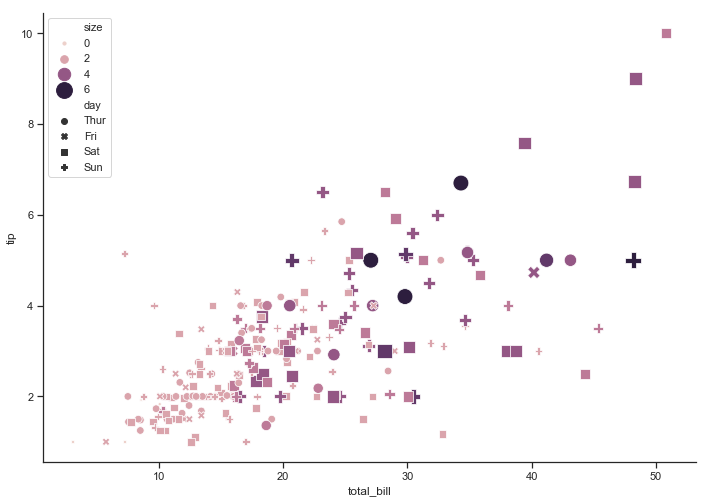

In [48]:
sns.set(style='ticks',rc={'figure.figsize':(11.7,8.27)})
g = sns.scatterplot(x="total_bill",
                y="tip",
                hue="size",
                size="size",
                sizes=(10, 250),
                style='day',
                alpha=1,
                data=tips)
g=sns.despine(top=True, right=True)


# Matrix plots

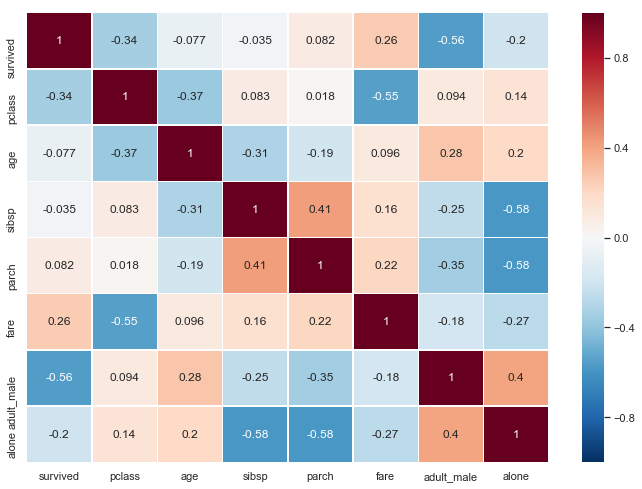

In [49]:
titanic = sns.load_dataset("titanic")
corr = titanic.corr()
sns.set_style('darkgrid')
sns.heatmap(corr,
            annot=True, # Displays the correlation value 
            linewidths=.5,
            xticklabels=True,
            yticklabels=True,
            cmap="RdBu_r", # Use a a diverging palette
            vmin=-1,
            vmax=1)

# Relational plots

## FacetGrid level

### Syntax 1 (less favored)

In [ ]:
tips = sns.load_dataset("tips")

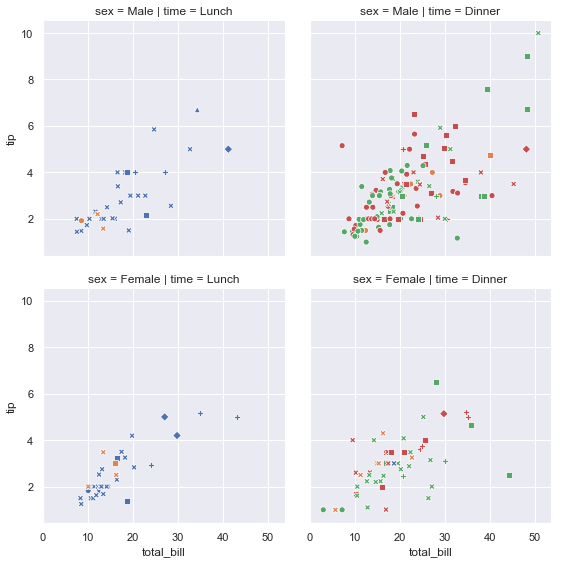

In [66]:
g = sns.FacetGrid(tips, col="time", row='sex',height=4, aspect=1)
g.map(
    sns.scatterplot,
    "total_bill",
    "tip",
    "day",
    "size",
    sizes=(10, 250)
)

## Syntax 2 (better)

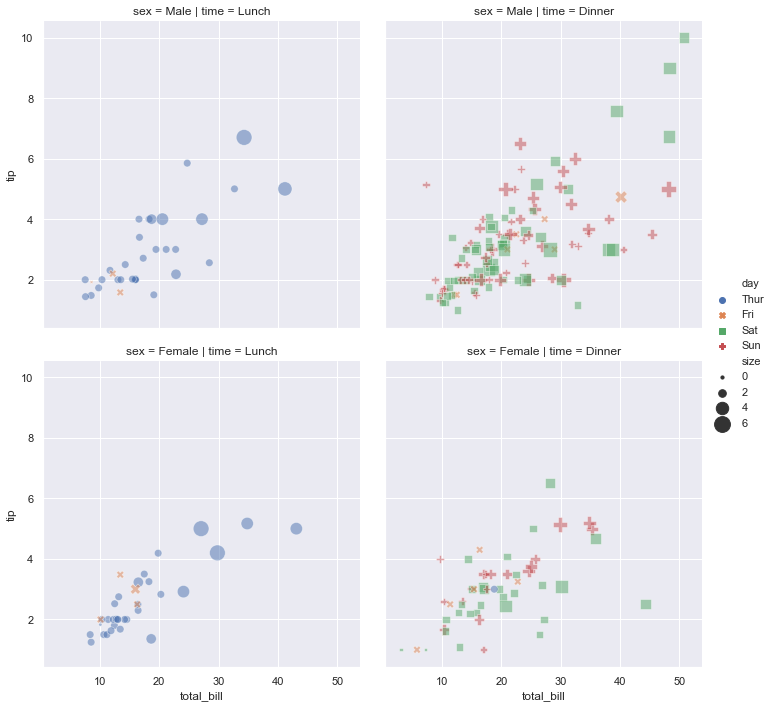

In [88]:
# We will use syntax 2 for all remaining examples

g = sns.relplot(
    x="total_bill",
    y="tip",
    hue="day",
    data=tips,
    col="time",
    row='sex',
    kind='scatter',
    size="size",
    sizes=(10, 250),
    style='day',
    alpha=0.5,
)
# kind=scatter/line
# 4 variables at play: x/y/category 1/size

## Axes level

### Scatterplot

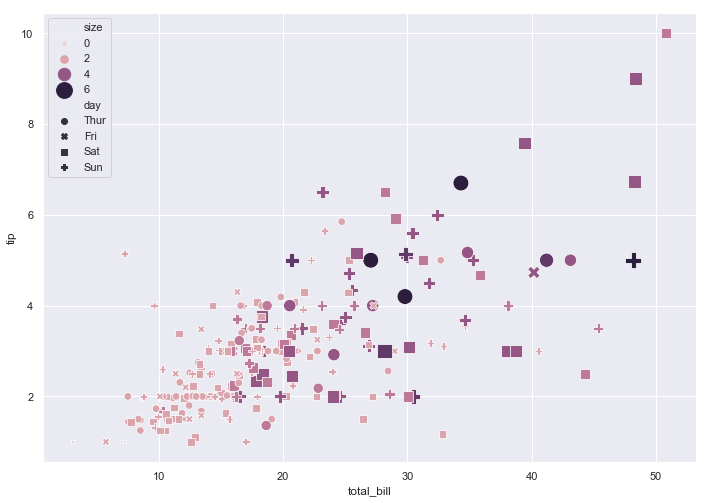

In [86]:
g = sns.scatterplot(
    x="total_bill",
    y="tip",
    data=tips,
    hue="size",
    size="size",
    sizes=(10, 250),
    style='day',
    alpha=1,
)

### Lineplot

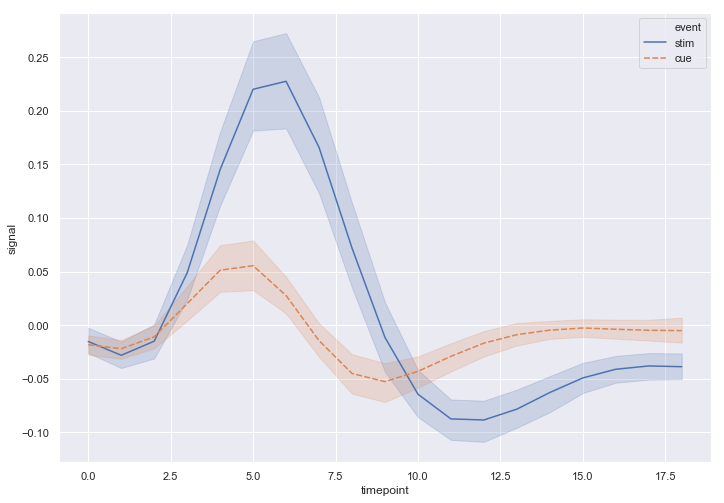

In [87]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint",
                  y="signal",
                  data=fmri,
                  hue="event",
                  style="event",
                  legend="full")

# Categorical plots

## FacetGrid level

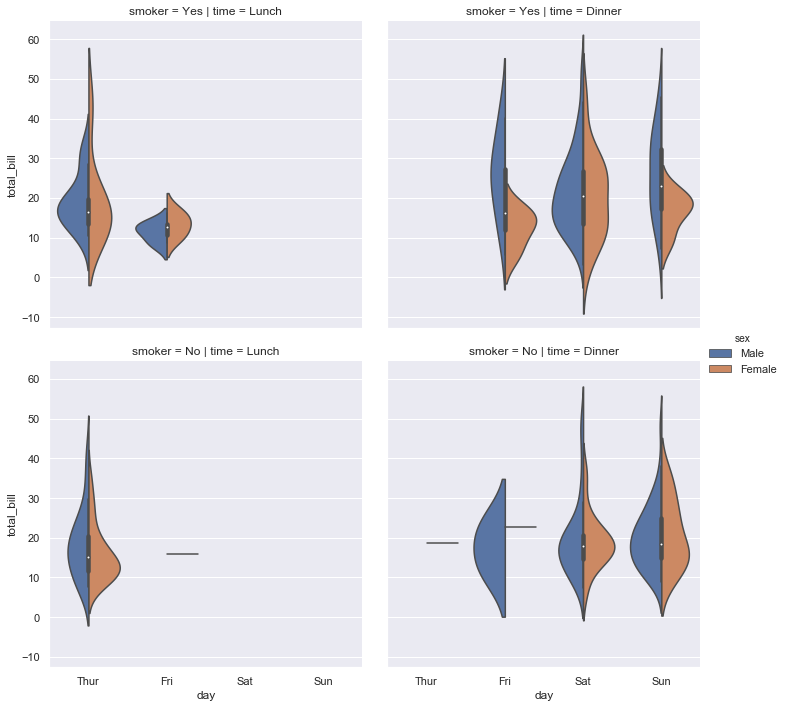

In [84]:
g = sns.catplot(x="day",
                y="total_bill",
                hue='sex',
                data=tips,
                col="time",
                row='smoker',
                kind='violin', # kind=strip/swarm/box/violin/point/bar/count
                split=True) # Make it a habit to put specific plot parameters at the end

# Additional customization based on the parameters of each kind of plot is possible

## Categorical vs. Numeric Scatter

### Swarm (preferred)

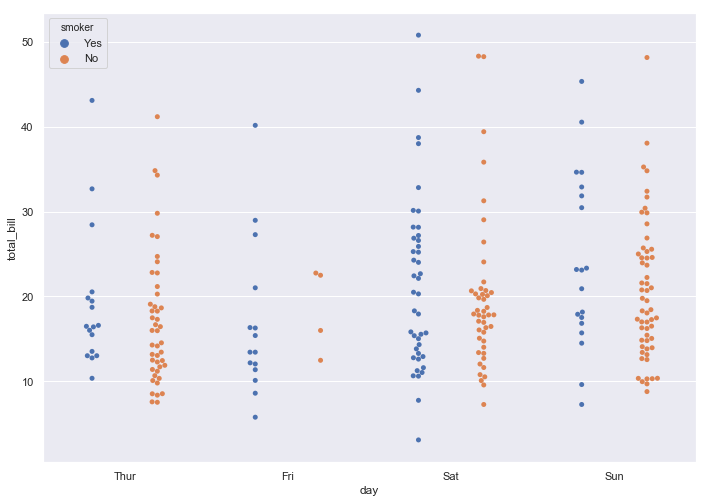

In [99]:
ax = sns.swarmplot(x="day", y="total_bill", data=tips, hue="smoker",dodge=True)

### Strip

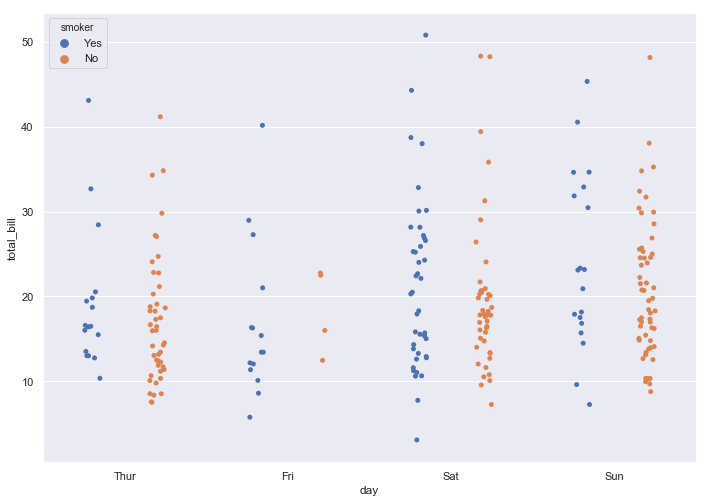

In [97]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue="smoker",dodge=True)

## Categorical vs. Numerical Distribution

### Boxplot

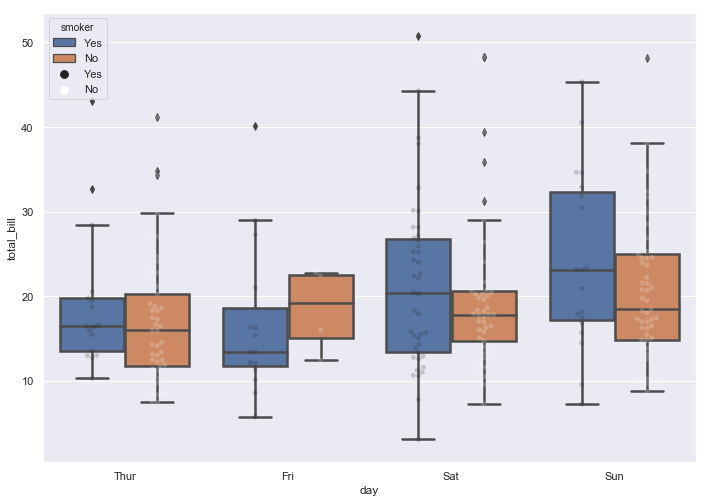

In [111]:
ax = sns.boxplot(x="day",
                 y="total_bill",
                 data=tips,
                 hue="smoker",
                 linewidth=2.5)

ax = sns.swarmplot(x="day",
                   y="total_bill",
                   data=tips,
                   hue="smoker",
                   dodge=True,
                   color="white",
                   alpha=0.2,
                   edgecolor="gray")

### Violinplot (Preferred)

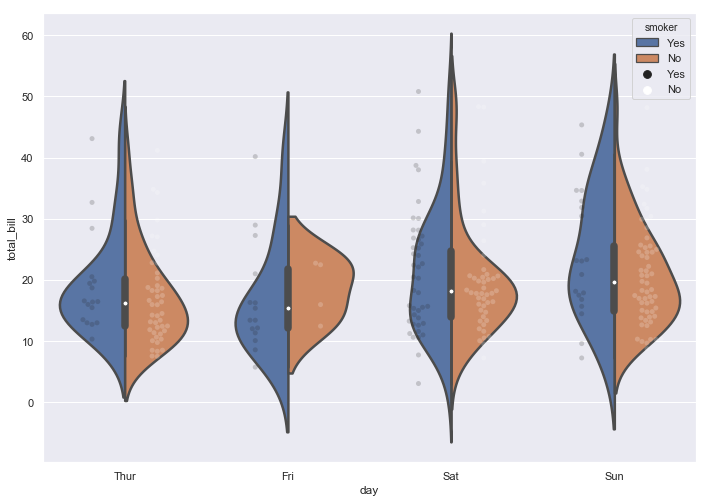

In [115]:
ax = sns.violinplot(x="day",
                    y="total_bill",
                    data=tips,
                    hue="smoker",
                    split=True, # This affects the median value vs split=False
                    linewidth=2.5)

ax = sns.swarmplot(x="day",
                   y="total_bill",
                   data=tips,
                   hue="smoker",
                   dodge=True,
                   color="white",
                   alpha=0.2,
                   edgecolor="gray")

## Categorical vs Numerical Central Tendency + Error bars

### Pointplot

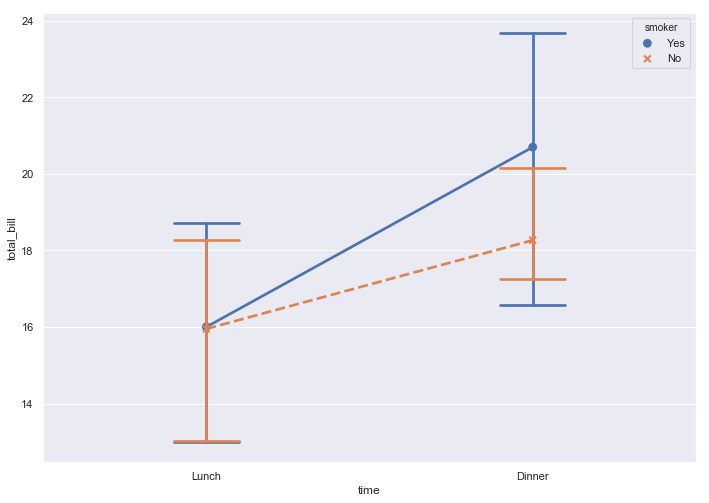

In [120]:
ax = sns.pointplot(
    x="time",
    y="total_bill",
    hue="smoker",
    data=tips,
    capsize=.2,
    estimator=np.median,
    markers=["o", "x"],
    linestyles=["-", "--"],
)

### Barplot

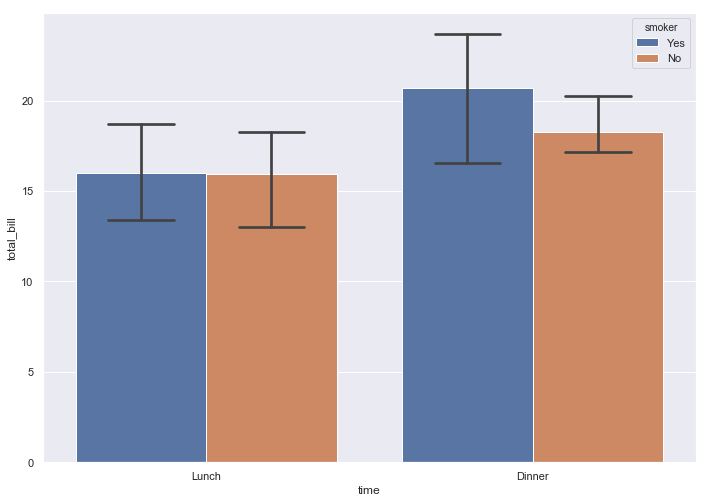

In [122]:
ax = sns.barplot(
    x="time",
    y="total_bill",
    hue="smoker",
    data=tips,
    capsize=.2,
    estimator=np.median
)

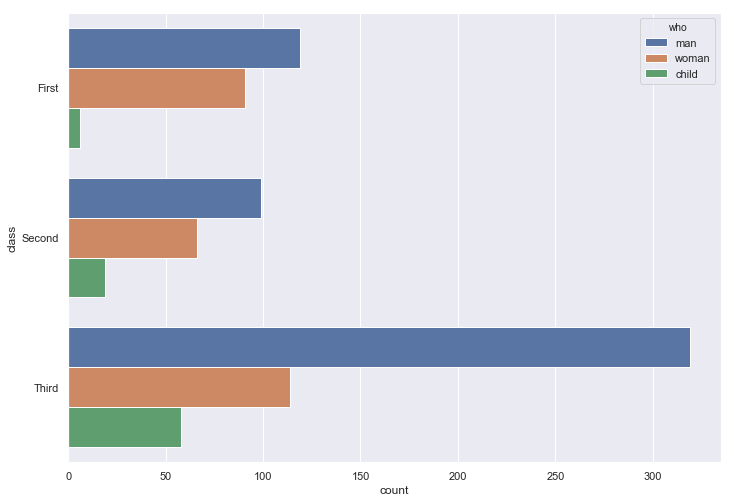

In [124]:
ax = sns.countplot(y="class", hue="who", data=titanic)
# Note horizontal/vertical is determined by whether categorical variable is on the x/y axis

# Distribution plots

## FacetGrid level - combined uni/bivariate

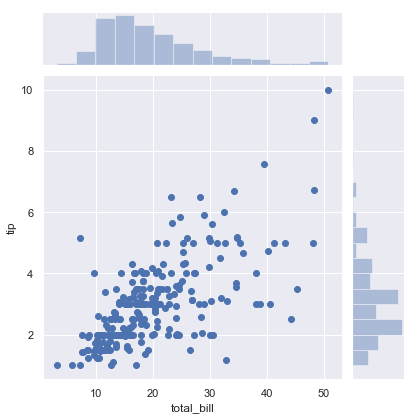

In [129]:
g = sns.jointplot("total_bill", "tip", data=tips, kind='scatter')

# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }

In [ ]:

pairplot - scatterplot across the entire dataset
distplot - univariate distribution

## Axes level

### Pairplot - bivariate

In [135]:
iris = sns.load_dataset("iris")
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


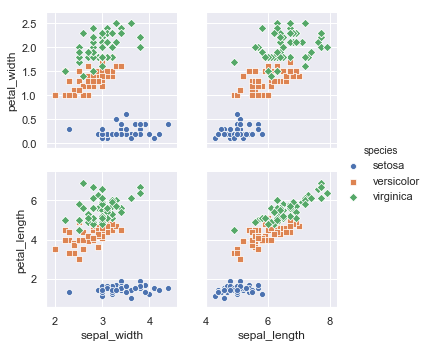

In [136]:
g = sns.pairplot(iris,
                 hue="species",
                 markers=["o", "s", "D"],
                 x_vars=["sepal_width", "sepal_length"],
                 y_vars=["petal_width", "petal_length"],
                 diag_kind="kde")

### Distplot - univariate

In [138]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

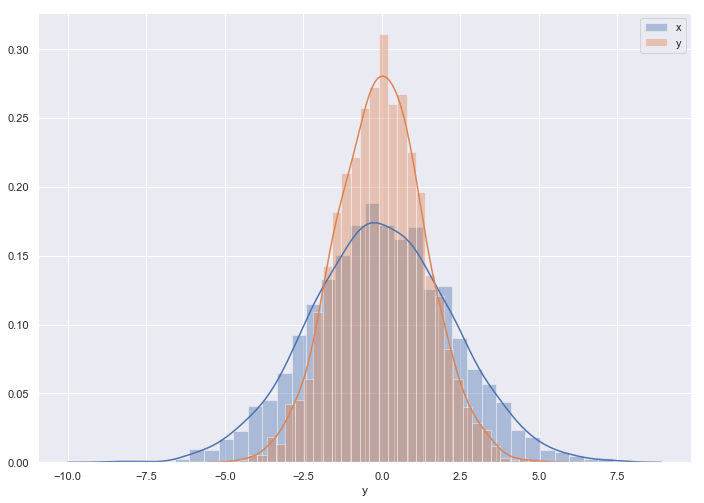

In [145]:
for col in data:
    sns.distplot(data[col],
                 kde=True, # Distribution line 
                 rug=False, # Display individual values
                 norm_hist=True, # Normalive y axis to sum up to 1
                 label=str(col))
    plt.legend()

# Time Series

In [23]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


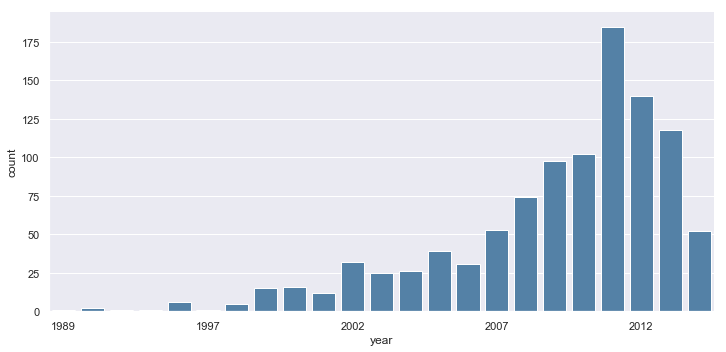

In [24]:
g = sns.catplot("year",
                data=planets,
                aspect=2,
                kind="count",
                color='steelblue')
g.set_xticklabels(step=5)

# Linear regression

## FacetGrid level

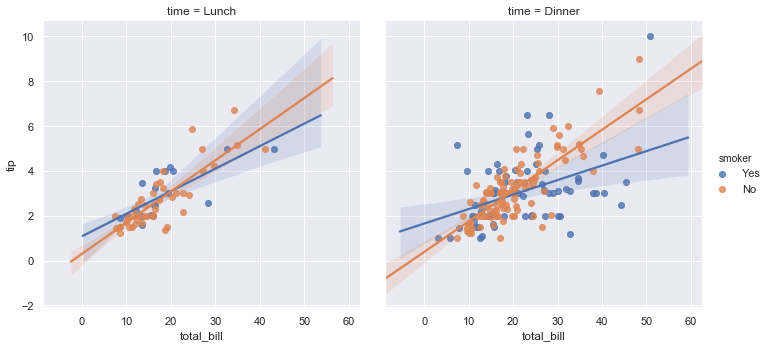

In [146]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
           data=tips);

## Regplot

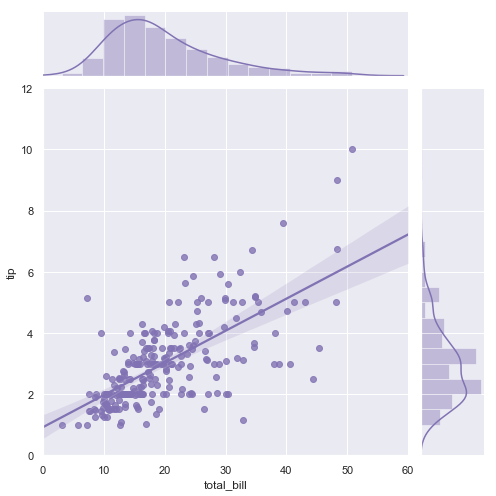

In [17]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)